In [14]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split,GridSearchCV,cross_val_score
from sklearn.metrics import mean_squared_error,r2_score
import matplotlib.pyplot as plt
from sklearn.preprocessing import scale
from sklearn.preprocessing import StandardScaler
from sklearn import model_selection
from sklearn.neighbors import KNeighborsRegressor
from sklearn.ensemble import RandomForestRegressor
from sklearn import neighbors
from sklearn.svm import SVR
from sklearn.cluster import KMeans
import seaborn as sns

In [16]:
dataset = pd.read_csv('musteriler.csv')

In [17]:
dataset.head()

,No,Cinsiyet,Yas,Hacim,Maas
0,1,K,60,69900,6325
1,2,K,30,79000,5200
2,3,E,52,85500,7825
3,4,E,57,17100,8375
4,5,E,55,5500,5450


In [18]:
dataset.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   No        200 non-null    int64 
 1   Cinsiyet  200 non-null    object
 2   Yas       200 non-null    int64 
 3   Hacim     200 non-null    int64 
 4   Maas      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [19]:
dataset.describe()

,No,Yas,Hacim,Maas
count,200.000000,200.000000,200.000000,200.000000
mean,100.500000,46.155000,53620.500000,5954.375000
std,57.879185,17.492309,34855.146477,1777.210276
min,1.000000,19.000000,0.000000,2600.000000
25%,50.750000,30.000000,26575.000000,4550.000000
50%,100.500000,47.000000,46400.000000,5775.000000
75%,150.250000,63.000000,78225.000000,7431.250000
max,200.000000,75.000000,143500.000000,10075.000000


In [20]:
dataset.drop_duplicates(inplace=True)

In [21]:
X = dataset.iloc[:, [2, 3]].values

In [22]:
from sklearn.cluster import KMeans
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

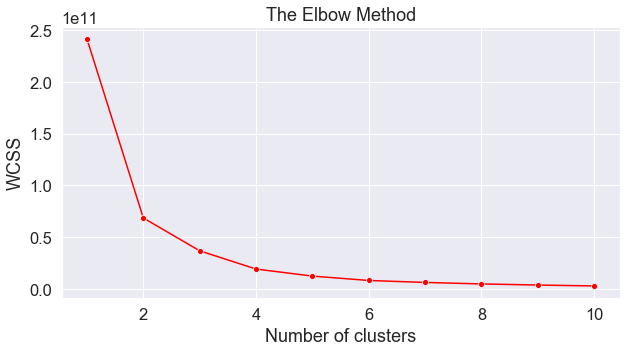

In [23]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

In [26]:
kmeans = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42)
y_kmeans = kmeans.fit_predict(X)

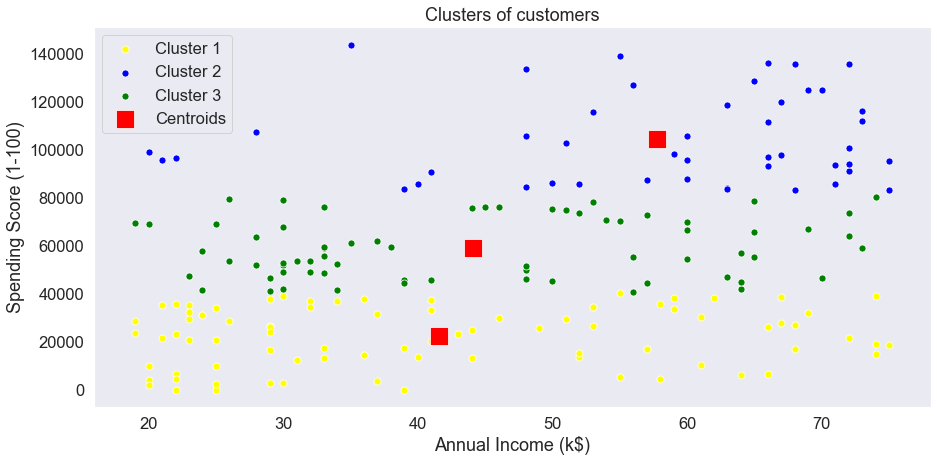

In [27]:
plt.figure(figsize=(15,7))
sns.scatterplot(X[y_kmeans == 0, 0], X[y_kmeans == 0, 1], color = 'yellow', label = 'Cluster 1',s=50)
sns.scatterplot(X[y_kmeans == 1, 0], X[y_kmeans == 1, 1], color = 'blue', label = 'Cluster 2',s=50)
sns.scatterplot(X[y_kmeans == 2, 0], X[y_kmeans == 2, 1], color = 'green', label = 'Cluster 3',s=50)
sns.scatterplot(X[y_kmeans == 3, 0], X[y_kmeans == 3, 1], color = 'grey', label = 'Cluster 4',s=50)
sns.scatterplot(X[y_kmeans == 4, 0], X[y_kmeans == 4, 1], color = 'orange', label = 'Cluster 5',s=50)
sns.scatterplot(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s=300,marker=',')
plt.grid(False)
plt.title('Clusters of customers')
plt.xlabel('Annual Income (k$)')
plt.ylabel('Spending Score (1-100)')
plt.legend()
plt.show()

In [28]:
df=pd.read_csv("musteriler.csv")
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 200 entries, 0 to 199
Data columns (total 5 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   No        200 non-null    int64 
 1   Cinsiyet  200 non-null    object
 2   Yas       200 non-null    int64 
 3   Hacim     200 non-null    int64 
 4   Maas      200 non-null    int64 
dtypes: int64(4), object(1)
memory usage: 7.9+ KB


In [33]:
df=df.dropna()
dms=pd.get_dummies(df[['Cinsiyet']])
y=df["Maas"]
X_=df.drop(['Maas','Cinsiyet'],axis=1).astype('float64')
X=pd.concat([X_],axis=1)
X_train,X_test,y_train,y_test=train_test_split(X,y,test_size=0.25,random_state=42)

In [34]:
X_train.head()

,No,Yas,Hacim
114,115.0,59.0,98100.0
173,174.0,30.0,39000.0
5,6.0,68.0,27200.0
126,127.0,44.0,24900.0
117,118.0,67.0,97900.0


In [35]:
knn_model=KNeighborsRegressor().fit(X_train,y_train)

In [36]:
knn_model

KNeighborsRegressor(algorithm='auto', leaf_size=30, metric='minkowski',
                    metric_params=None, n_jobs=None, n_neighbors=5, p=2,
                    weights='uniform')

In [37]:
knn_model.predict(X_test)[0:5]

array([6680., 8355., 4750., 8035., 7930.])

In [38]:
y_pred=knn_model.predict(X_test)

In [39]:
np.sqrt(mean_squared_error(y_test,y_pred))

1364.833506329618

In [40]:
RMSE=[]

for k in range(10):
    k=k+1
    knn_model=KNeighborsRegressor(n_neighbors=k).fit(X_train,y_train)
    y_pred=knn_model.predict(X_test)
    rmse=np.sqrt(mean_squared_error(y_test,y_pred))
    RMSE.append(rmse)
    print("k=",k,"için RMSE değeri:",rmse)

k= 1 için RMSE değeri: 2219.994369362229
k= 2 için RMSE değeri: 1712.2983457914102
k= 3 için RMSE değeri: 1507.6278276374003
k= 4 için RMSE değeri: 1388.1465272981811
k= 5 için RMSE değeri: 1364.833506329618
k= 6 için RMSE değeri: 1263.982215724045
k= 7 için RMSE değeri: 1232.116355822661
k= 8 için RMSE değeri: 1211.3207054956586
k= 9 için RMSE değeri: 1239.8604810000515
k= 10 için RMSE değeri: 1254.3154009259395


Text(0, 0.5, 'Mean Error')

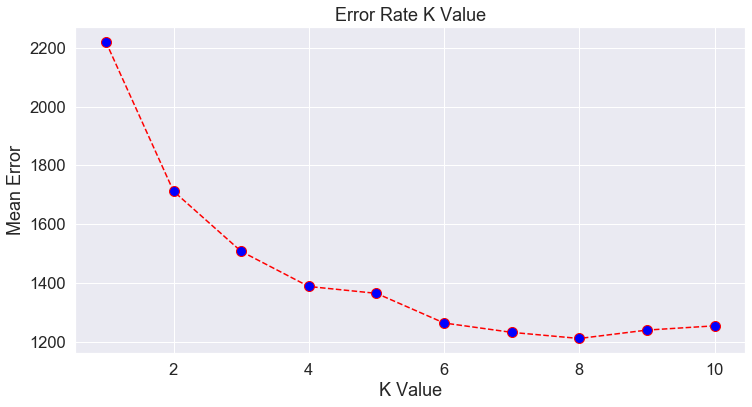

In [41]:
plt.figure(figsize=(12, 6))
plt.plot(range(1, 11), RMSE, color='red', linestyle='dashed', marker='o',markerfacecolor='blue', markersize=10)
plt.title('Error Rate K Value')
plt.xlabel('K Value')
plt.ylabel('Mean Error')

In [42]:
knn_params={"n_neighbors":np.arange(1,30,1)}

In [43]:
knn=KNeighborsRegressor()

In [44]:
knn_cv_model=GridSearchCV(knn,knn_params,cv=2).fit(X_train,y_train)

In [45]:
knn_cv_model.best_params_

{'n_neighbors': 23}

In [46]:
knn_tuned=KNeighborsRegressor(n_neighbors=knn_cv_model.best_params_["n_neighbors"]).fit(X_train,y_train)

In [47]:
y_pred=knn_tuned.predict(X_test)

In [48]:
np.sqrt(mean_squared_error(y_test,y_pred))

1267.245395807263